<a href="https://www.kaggle.com/code/gabkgonzales/predicting-career-change?scriptVersionId=208778740" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Bibliotecas padrão
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas ML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [2]:
# Carregando dados
df = pd.read_csv('/kaggle/input/field-of-study-vs-occupation/career_change_prediction_dataset.csv')

In [3]:
print(" \n Dados do Dataset: \n")
df.info()

 
 Dados do Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Field of Study               38444 non-null  object
 1   Current Occupation           38444 non-null  object
 2   Age                          38444 non-null  int64 
 3   Gender                       38444 non-null  object
 4   Years of Experience          38444 non-null  int64 
 5   Education Level              38444 non-null  object
 6   Industry Growth Rate         38444 non-null  object
 7   Job Satisfaction             38444 non-null  int64 
 8   Work-Life Balance            38444 non-null  int64 
 9   Job Opportunities            38444 non-null  int64 
 10  Salary                       38444 non-null  int64 
 11  Job Security                 38444 non-null  int64 
 12  Career Change Interest       38444 non-null  int64 
 13  Skills G

In [4]:
df.head(10)

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1
5,Medicine,Lawyer,56,Male,39,Bachelor's,Low,3,1,99,...,10,Medium,1,0,0,0,10,0,3,1
6,Medicine,Software Developer,51,Female,29,High School,Low,7,4,13,...,6,High,1,1,0,1,4,1,10,0
7,Medicine,Artist,58,Female,32,High School,High,9,4,77,...,8,Medium,0,0,0,0,6,0,4,0
8,Computer Science,Software Developer,31,Female,38,Bachelor's,Low,1,5,56,...,6,Medium,0,1,0,0,10,1,7,1
9,Business,Doctor,30,Female,16,Master's,Medium,8,5,98,...,6,High,0,0,0,0,3,2,3,0


In [5]:
# Valores ausentes

missing_data = df.isnull().sum()
print(" \n Valores Ausentes: \n")
print(missing_data)

 
 Valores Ausentes: 

Field of Study                    0
Current Occupation                0
Age                               0
Gender                            0
Years of Experience               0
Education Level                   0
Industry Growth Rate              0
Job Satisfaction                  0
Work-Life Balance                 0
Job Opportunities                 0
Salary                            0
Job Security                      0
Career Change Interest            0
Skills Gap                        0
Family Influence               9632
Mentorship Available              0
Certifications                    0
Freelancing Experience            0
Geographic Mobility               0
Professional Networks             0
Career Change Events              0
Technology Adoption               0
Likely to Change Occupation       0
dtype: int64


In [6]:
# Preenchendo Missing Data com Fillna
df['Family Influence'] = df['Family Influence'].fillna(df['Family Influence'].mode()[0])
missing_after = df.isnull().sum()

# Check
print("\n Valores ausentes depois do preenchimento: \n")
print(missing_after)


 Valores ausentes depois do preenchimento: 

Field of Study                 0
Current Occupation             0
Age                            0
Gender                         0
Years of Experience            0
Education Level                0
Industry Growth Rate           0
Job Satisfaction               0
Work-Life Balance              0
Job Opportunities              0
Salary                         0
Job Security                   0
Career Change Interest         0
Skills Gap                     0
Family Influence               0
Mentorship Available           0
Certifications                 0
Freelancing Experience         0
Geographic Mobility            0
Professional Networks          0
Career Change Events           0
Technology Adoption            0
Likely to Change Occupation    0
dtype: int64


In [7]:
df.describe()

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,39.540422,19.548200,5.489673,5.517012,50.308267,114975.623999,5.481896,0.199901,5.520133,0.299943,0.298616,0.149204,0.303975,5.514098,1.003304,5.487904,0.576553
std,11.574509,11.552474,2.870407,2.879007,28.877294,48963.725598,2.870640,0.399931,2.870065,0.458239,0.457657,0.356294,0.459978,2.868188,0.815953,2.857247,0.494111
min,20.000000,0.000000,1.000000,1.000000,1.000000,30005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,30.000000,10.000000,3.000000,3.000000,25.000000,72701.500000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000
50%,40.000000,20.000000,6.000000,6.000000,50.000000,114861.000000,5.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,5.000000,1.000000
75%,50.000000,30.000000,8.000000,8.000000,75.000000,157241.000000,8.000000,0.000000,8.000000,1.000000,1.000000,0.000000,1.000000,8.000000,2.000000,8.000000,1.000000
max,59.000000,39.000000,10.000000,10.000000,100.000000,199996.000000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2.000000,10.000000,1.000000


In [8]:
# Enconding colunas categóricas com LabelEncoder

label_encoding = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoding.fit_transform(df[col])

In [9]:
df.head(10)

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,8,2,48,1,7,1,0,7,10,83,...,8,0,0,0,0,1,2,0,1,0
1,5,4,44,1,26,2,1,10,3,55,...,3,2,0,0,1,1,2,1,9,0
2,5,1,21,0,27,2,1,8,3,78,...,4,1,0,0,0,0,2,1,2,0
3,5,2,33,1,14,3,2,7,9,62,...,2,2,1,0,0,0,9,0,1,0
4,0,3,28,0,0,3,1,3,1,8,...,5,1,0,0,1,0,2,0,7,1
5,8,5,56,1,39,0,1,3,1,99,...,10,2,1,0,0,0,10,0,3,1
6,8,8,51,0,29,1,1,7,4,13,...,6,0,1,1,0,1,4,1,10,0
7,8,0,58,0,32,1,0,9,4,77,...,8,2,0,0,0,0,6,0,4,0
8,3,8,31,0,38,0,1,1,5,56,...,6,2,0,1,0,0,10,1,7,1
9,2,3,30,0,16,2,2,8,5,98,...,6,0,0,0,0,0,3,2,3,0


In [10]:
# Definindo Features e Target

X = df.drop('Likely to Change Occupation', axis=1) # Features
y = df['Likely to Change Occupation'] # Alvo (var dependente)

In [11]:
# Dividindo em sets de treinamento e testes (80% train - 20% tests)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, y_train.shape

((30755, 22), (30755,))

In [13]:
# Random Forest Classifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

print("\n Performace do modelo::\n")
print(classification_report(y_test, y_pred))


 Performace do modelo::

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3212
           1       1.00      1.00      1.00      4477

    accuracy                           1.00      7689
   macro avg       1.00      1.00      1.00      7689
weighted avg       1.00      1.00      1.00      7689



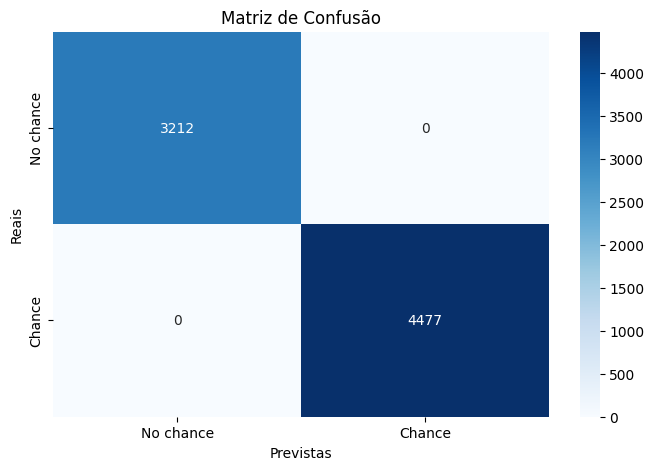

In [15]:
# Plot da Matriz de Confusão

plt.figure(figsize=(8, 5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No chance', 'Chance'], yticklabels=['No chance', 'Chance'])
plt.title('Matriz de Confusão')
plt.xlabel('Previstas')
plt.ylabel('Reais')
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("\n Cross-validation :\n ", cv_scores)
print("\n Mean CV:\n ", cv_scores.mean())


 Cross-validation :
  [0.99986994 0.99986994 1.         1.         1.        ]

 Mean CV:
  0.9999479776303811


In [17]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [18]:
# Importancia das Features pro modelo

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

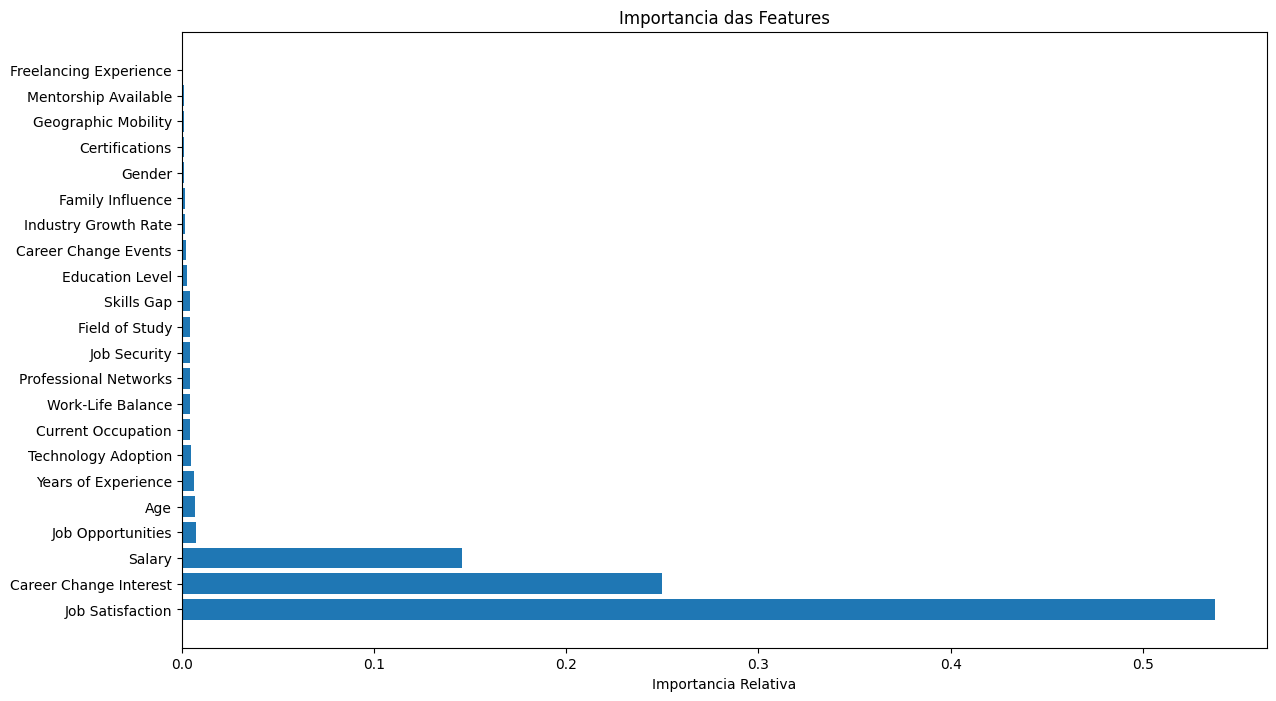

In [19]:
plt.figure(figsize=(14, 8))
plt.title("Importancia das Features")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel("Importancia Relativa")
plt.show()